In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import pdb
from matplotlib.colors import ListedColormap

In [114]:
total_class_num = 100
selected_class_num = 5

In [3]:
def normalize_array(array):
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    return normalized_array

In [159]:
model_teacher = models.resnet18(num_classes=100)
model_teacher.conv1 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
model_teacher.maxpool = nn.Identity()
model_teacher = torch.nn.DataParallel(model_teacher).cuda()
checkpoint = torch.load('/root/SRE_repro/save/cifar100/resnet18_E200/ckpt.pth')
model_teacher.load_state_dict(checkpoint["state_dict"])
model_teacher = nn.Sequential(*(list(model_teacher.module.children())[:-2]))
# model_feature_hook.eval()
model_teacher.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): Identity()
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), b

In [131]:
tsne = TSNE(n_components=2, random_state=42)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

In [157]:
from torchvision.datasets import CIFAR100
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32, 32)),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])
cifar100_dataset = CIFAR100(root='/root/SRE_repro/data', train=True, download=True, transform=transform)
cifar100_loader = DataLoader(cifar100_dataset, batch_size=100, shuffle=False)
classes = np.random.choice(total_class_num, selected_class_num, replace=False)

Files already downloaded and verified


In [158]:
classes

array([86, 15, 21, 97, 47])

In [160]:
flag = True
for ci in range(len(classes)):
    class_to_plot = classes[ci]
    print('class_to_plot:', class_to_plot)
    with torch.no_grad():
        for images, batch_labels in cifar100_loader:
            images = images.cuda()
            features_batch = model_teacher(images)
            labels_batch = batch_labels.cpu().numpy()
            # # 找到第一个类别的索引
            class_indices = np.where(labels_batch == class_to_plot)[0]
            # print('class_indices:', class_indices)
            if len(class_indices) == 0:
                continue
            if flag:
                flag = False
                features_batch = features_batch[class_indices].squeeze().cpu().numpy()
                # print(features_batch.shape)
                features = features_batch.reshape(-1, 512, 4, 4)

                print('c', ci, 'total', features.shape)
            else:
                features_batch = features_batch[class_indices].cpu().numpy()
                # print(features_batch.shape)
                features = np.concatenate((features, features_batch), axis=0)
                print('c', ci, 'total', features.shape)
    print(features.shape)

class_to_plot: 86
c 0 total (1, 512, 4, 4)
c 0 total (2, 512, 4, 4)
c 0 total (4, 512, 4, 4)
c 0 total (5, 512, 4, 4)
c 0 total (6, 512, 4, 4)
c 0 total (7, 512, 4, 4)
c 0 total (8, 512, 4, 4)
c 0 total (9, 512, 4, 4)
c 0 total (10, 512, 4, 4)
c 0 total (12, 512, 4, 4)
c 0 total (14, 512, 4, 4)
c 0 total (16, 512, 4, 4)
c 0 total (17, 512, 4, 4)
c 0 total (19, 512, 4, 4)
c 0 total (21, 512, 4, 4)
c 0 total (22, 512, 4, 4)
c 0 total (23, 512, 4, 4)
c 0 total (25, 512, 4, 4)
c 0 total (26, 512, 4, 4)
c 0 total (27, 512, 4, 4)
c 0 total (28, 512, 4, 4)
c 0 total (29, 512, 4, 4)
c 0 total (31, 512, 4, 4)
c 0 total (32, 512, 4, 4)
c 0 total (33, 512, 4, 4)
c 0 total (34, 512, 4, 4)
c 0 total (36, 512, 4, 4)
c 0 total (38, 512, 4, 4)
c 0 total (39, 512, 4, 4)
c 0 total (42, 512, 4, 4)
c 0 total (43, 512, 4, 4)
c 0 total (44, 512, 4, 4)
c 0 total (45, 512, 4, 4)
c 0 total (47, 512, 4, 4)
c 0 total (50, 512, 4, 4)
c 0 total (51, 512, 4, 4)
c 0 total (52, 512, 4, 4)
c 0 total (56, 512, 4, 4)
c 

In [161]:
features_flat = features.reshape(features.shape[0], -1)
features_flat = normalize_array(features_flat)

In [162]:
features_flat.shape

(2500, 8192)

In [163]:
mtt_pt = torch.load('../cifar100_50/images_best.pt')
mean_mtt = torch.mean(mtt_pt, dim=(0, 2, 3))
std_mtt = torch.std(mtt_pt, dim=(0, 2, 3))
std_mtt

tensor([1.3531, 1.3106, 1.4120])

In [164]:
preprocess = transforms.Compose([
    # transforms.ToTensor(),
    transforms.Resize((32, 32)),
    transforms.Normalize(mean=mean_mtt, std=std_mtt)
])

data = [preprocess(image) for image in mtt_pt]
data = torch.stack(data)
data = data.cuda()

In [165]:
with torch.no_grad():
    features_distill = model_teacher(data)

In [166]:
features_distill.shape

torch.Size([5000, 512, 4, 4])

In [167]:
features_distill = features_distill.squeeze().cpu().numpy()
features_distill_flat = features_distill.reshape(features_distill.shape[0], -1)
features_distill_flat = normalize_array(features_distill_flat)

In [168]:
features_distill_flat.shape

(5000, 8192)

In [169]:
features_flat_conbimed = np.concatenate((features_flat, features_distill_flat), axis=0)


In [170]:
embedded_data_conbimed = tsne.fit_transform(features_flat_conbimed)


In [171]:
selected_class_num

5

In [172]:
classes

array([86, 15, 21, 97, 47])

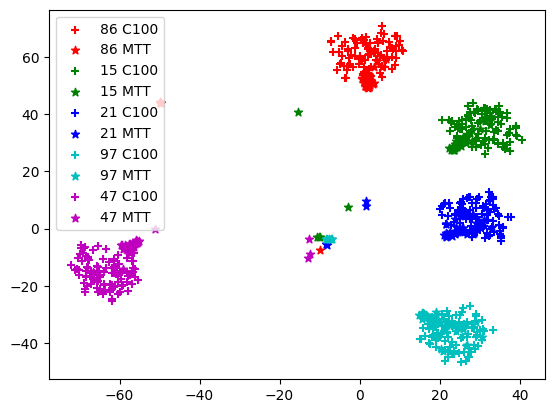

In [174]:
for i in range(selected_class_num):
    plt.scatter(
        embedded_data_conbimed[i * 500:(i) * 500+100, 0], 
        embedded_data_conbimed[i * 500:(i) * 500+100, 1], 
        # embedded_data_conbimed[i * 500:(i+1) * 500, 0], 
        # embedded_data_conbimed[i * 500:(i+1) * 500, 1], 
        label=str(classes[i])+' C100', 
        marker='+', 
        c=colors[i]
    )
    plt.scatter(
        embedded_data_conbimed[classes[i] * 50 + 2500:(classes[i]+1) * 50 + 2500, 0], 
        embedded_data_conbimed[classes[i] * 50 + 2500:(classes[i]+1) * 50 + 2500, 1], 
        label=str(classes[i])+' MTT', 
        marker='*', 
        c=colors[i]
        )

plt.legend()
# plt.savefig('MTT cifar100_50')
# plt.savefig('tsne_MTT_mix.png')
# plt.show()